In [ ]:
import cv2
import numpy as np
from PIL import Image
import os



In [ ]:
image_path = '/content/Picture1.jpg'
img = cv2.imread(image_path)

jpeg_path = "/content/compressed_image.jpg"
cv2.imwrite(jpeg_path, img, [cv2.IMWRITE_JPEG_QUALITY, 50])




True

In [ ]:
jpeg_size = os.path.getsize(jpeg_path) / 1024  # KB
png_size = os.path.getsize(png_path) / 1024  # KB

In [ ]:
print(f"Original Image Size: {os.path.getsize(image_path)/1024:.2f} KB")
print(f"JPEG Compressed Size: {jpeg_size:.2f} KB")
print(f"PNG Compressed Size: {png_size:.2f} KB")


Original Image Size: 63.69 KB
JPEG Compressed Size: 26.17 KB
PNG Compressed Size: 214.61 KB


In [ ]:
image_path = '/content/Picture1.jpg'
img = cv2.imread(image_path)
png_path = "/content/compressed_image.png"
cv2.imwrite(png_path, img, [cv2.IMWRITE_PNG_COMPRESSION, 9])



True

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3293 - loss: 1.8116 - val_accuracy: 0.5456 - val_loss: 1.2730
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5689 - loss: 1.2158 - val_accuracy: 0.6132 - val_loss: 1.1000
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6353 - loss: 1.0410 - val_accuracy: 0.6425 - val_loss: 1.0276
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6797 - loss: 0.9218 - val_accuracy: 0.6707 - val_loss: 0.9607
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7123 - loss: 0.8283 - val_accuracy: 0.6873 - val_loss: 0.9105
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7337 - loss: 0.7651 - val_accuracy: 0.6950 - val_loss: 0.8945
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7570 - loss: 0.6934 - val_accuracy: 0.7079 - val_loss: 0.8584
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7736 - loss: 0.6463 - val_accuracy: 0

In [ ]:

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.73      1000
           1       0.83      0.82      0.83      1000
           2       0.66      0.57      0.61      1000
           3       0.52      0.59      0.55      1000
           4       0.63      0.72      0.67      1000
           5       0.72      0.48      0.58      1000
           6       0.73      0.81      0.77      1000
           7       0.76      0.72      0.74      1000
           8       0.83      0.77      0.80      1000
           9       0.72      0.81      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



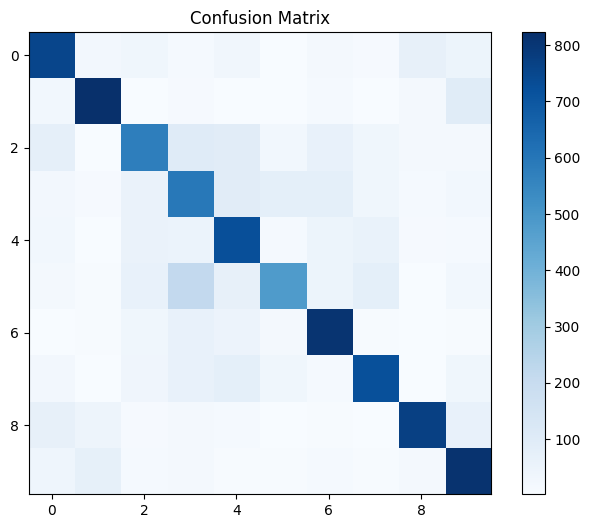

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


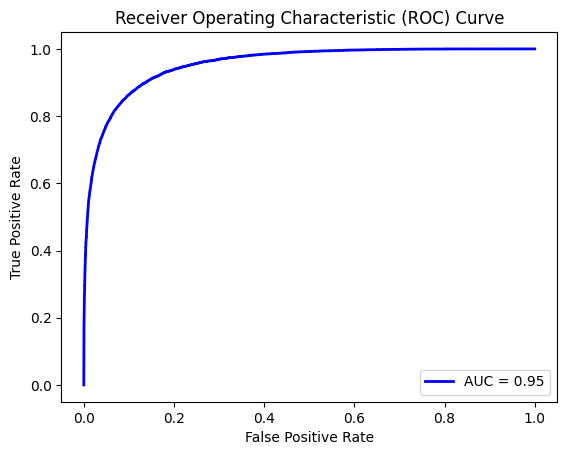

In [ ]:

y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)
fpr, tpr, _ = roc_curve(y_test_one_hot.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
